In [1]:
from PIL import Image, ImageFilter, ImageChops
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools

In [5]:
img0 = Image.open('dataset1/0.bmp').convert('L')
img1 = Image.open('dataset1/1.bmp').convert('L')
img2 = Image.open('dataset1/2.bmp').convert('L')
img3 = Image.open('dataset1/3.bmp').convert('L')
images = [img0, img1, img2, img3]

In [6]:
# Send in np array foe each image
def show_images(images):
    plt.figure(figsize=(200,100))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image, cmap=plt.get_cmap('gray'))

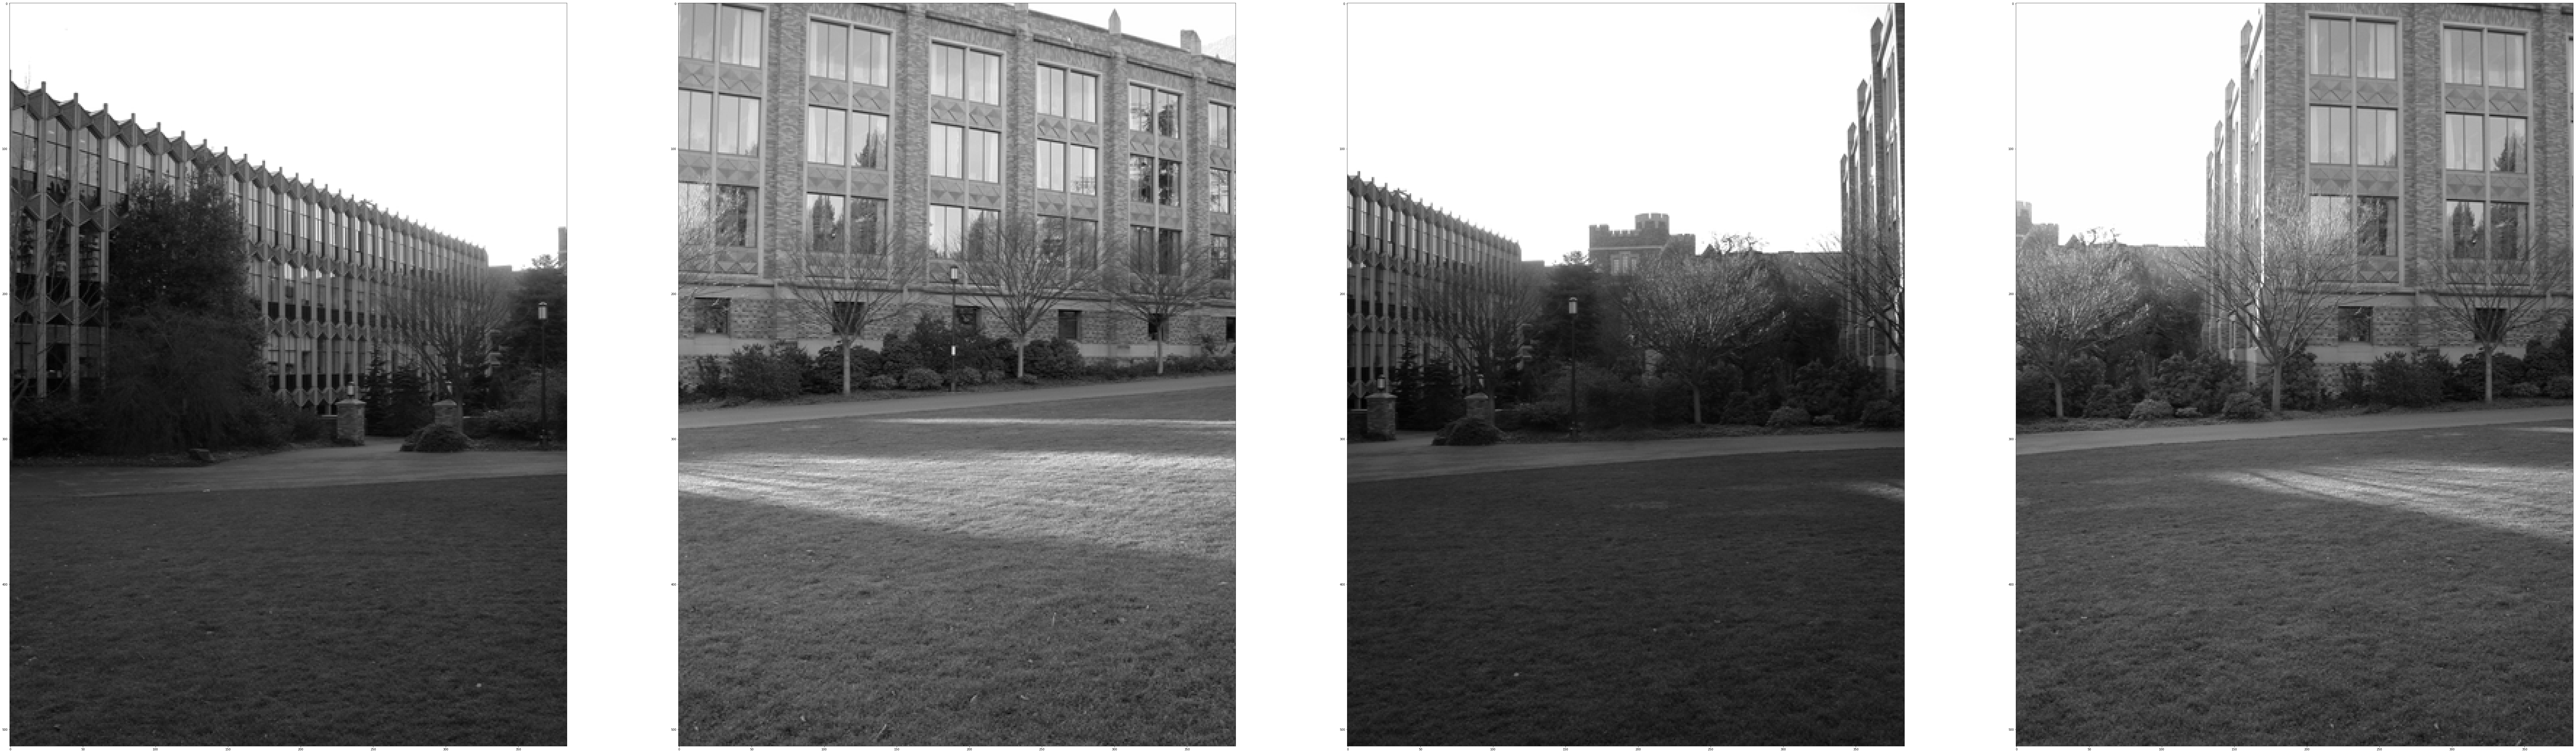

In [7]:
arr = [np.array(i) for i in images]
show_images(arr)

In [8]:
array = [[] for x in range(5)]
# array.append([])
# array[0].append(img0)
array

[[], [], [], [], []]

In [9]:
def scale_space(img, num_octaves, blurs_per_octave, blur_radius=1/math.sqrt(2)):
    img = img.resize((2*img.width, 2*img.height), Image.ANTIALIAS)
    scale_space_images = [[] for x in range(num_octaves)]
    for octave in range(num_octaves):
        if octave:
            img = img.resize((img.width // 2, img.height // 2), Image.ANTIALIAS)
        for blur in range(blurs_per_octave):
            current_blur_radius = blur_radius * 2**(octave) * math.sqrt(2)**blur
            current_image = img.filter(ImageFilter.GaussianBlur(current_blur_radius))
            scale_space_images[octave].append(current_image)
    return scale_space_images

In [10]:
scale_images = scale_space(img0, 4, 5)
# scale_images[0][0]

<class 'list'>


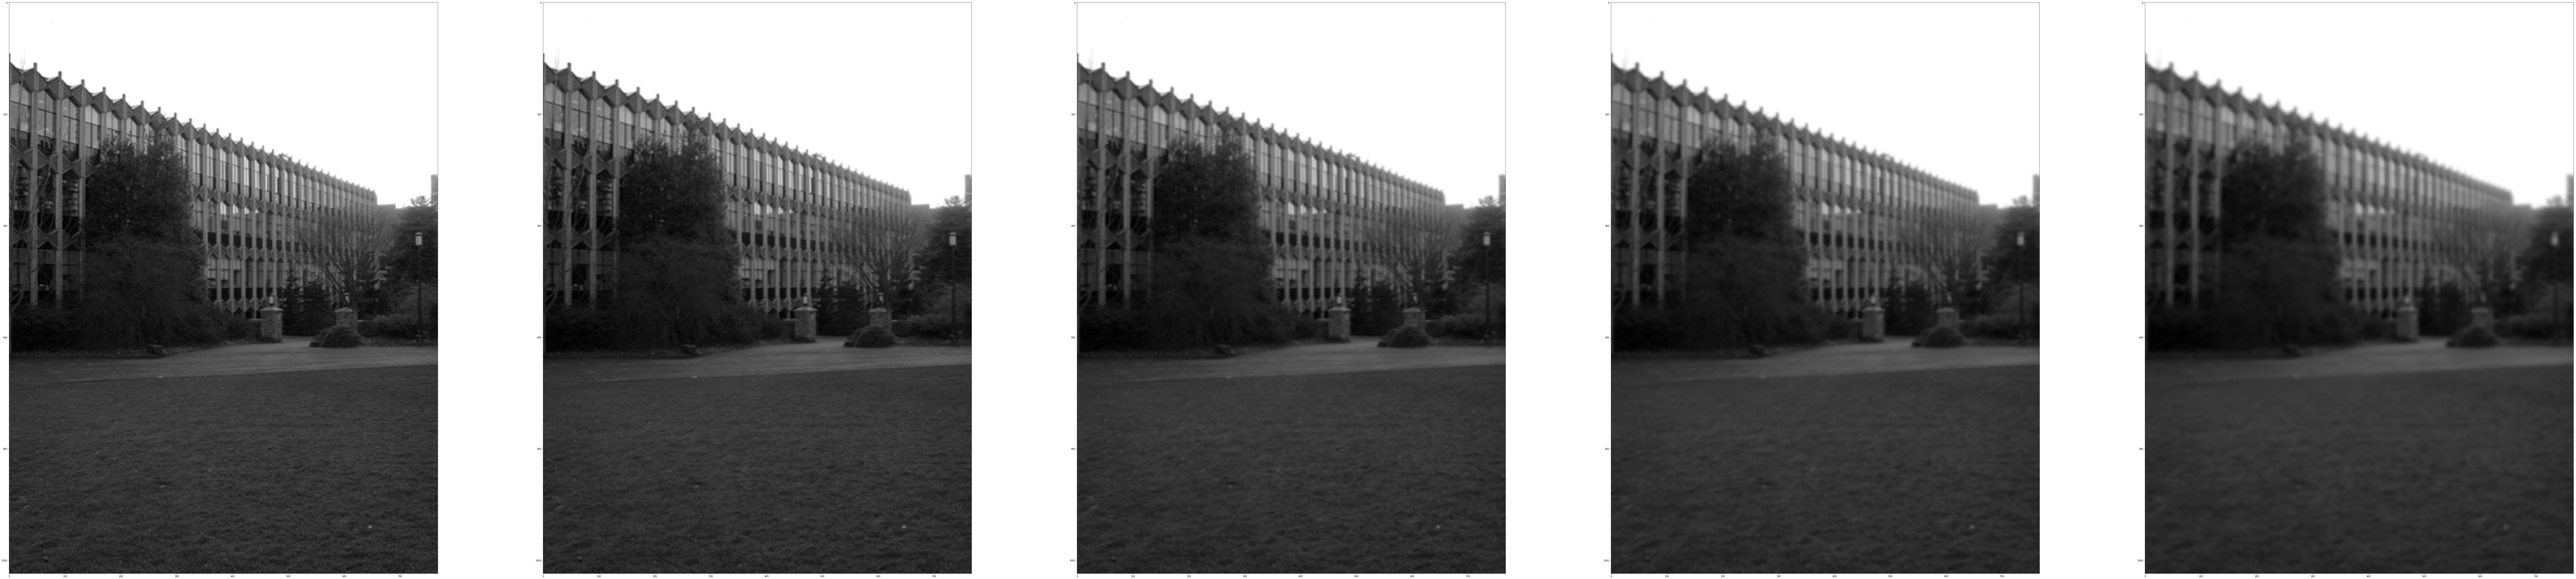

In [11]:
show_images([np.array(x) for x in scale_images[0]])
print(type(scale_images))

In [12]:
# LoG is computationally expensive
# DoG is much faster and can be used as an approximation
def create_DoG(first_image, second_image):
    return ImageChops.difference(first_image, second_image)

def create_scale_images_DoG(scale_images):
    diff_of_gaussians = []
    for octave in scale_images:
        diff_of_gaussians.append([create_DoG(octave[x], octave[x+1]) for x in range(len(octave)-1)])
        
    return diff_of_gaussians


In [13]:
diff_of_gauss = create_scale_images_DoG(scale_images)

In [14]:
def convert_PIL_to_numpy(image):
    return np.array(image)

def convert_images_to_numpy(images):
    np_images = []
    for octave in images:
        np_images.append([convert_PIL_to_numpy(octave[x]) for x in range(len(octave))])
        
    return np_images

In [15]:
diff_of_gauss = convert_images_to_numpy(diff_of_gauss)

In [16]:
def find_keypoints(diff_of_gauss):
    for octave in diff_of_gauss:
        # Iterate between the sandwiched layers
        for p_curr_layer in range(1, len(octave) - 1):
            layer = octave[p_curr_layer]
            # Assuming that image edges are not valid keypoints (lack of neighbours)
            for p_curr_row in range(1, len(layer)-1):
                for p_curr_col in range(1, len(layer[p_curr_row])-1):
                    # Add a case to skip adding to list if indices are all 0
                    # TODO(sumobot1): Change function to stop after detecting a neighbouring pixel with a higher/lower value
                    thing = list(map(lambda indices: octave[p_curr_layer+indices[0]][p_curr_row+indices[1]][p_curr_col+indices[2]], list([list(x) for x in itertools.product([-1, 0, 1], repeat=3)])))
    return thing
                    
#                     for p_neigh_layer in range(p_curr_layer - 1, p_curr_layer + 2):
#                         for p_neigh_row in range(p)
thing = find_keypoints(diff_of_gauss)
            

In [17]:
print(thing)

[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [72]:
thing[0][2]

1